# **Capstone Project Module 2**

***Case Study: Online Retail Shipping***

## **Background**

An e-commerce company that operates an online retail business within a country has several warehouses with various capacities in storing its products and different mode of shipments in shipping its products to each customer. Based on the recent UX survey results and previous sales activity data, the company seems to have a mixed review on its performance based on the number of customer care calls made, the customer rating, prior purchases, product importances, and most importantly the punctuality of the product to reach the customer on time.

These factors may have stemmed from many common challenges in e-commerce logistics that lead to problems. Warehouse operations can quickly break down due to an inventory miscount or issues with your back-end e-commerce warehouse logistics. However, warehouse optimization plans can offset these problems.

## **Problem Statement**

Warehouse optimization is the process in which the use of time, space, and resources in a warehouse is made more efficient through automation and careful planning, improving customer satisfaction and experience.

The company wants to know whether each of the warehouse can be fully optimized to meet certain standard of satisfaction. Based on the collected data from the company, each warehouse will be assessed according to few parameters before conclusion is drawn. The findings from the analysis will be used to determine which warehouse has the best overall attribute.

As a **Data Analyst**, the challenge faced is to provide insights from such analysis on what are the key factors that each warehouse is lacking and recommend solutions directed to **Warehouse Manager** as the stakeholder in order to make business decision making on what kinds of improvement that may be suggested to alleviate those lacking key factors so every warehouse can reach certain standard of satisfaction and be fully optimized.

## **Dataset**

Before addressing the challenge, analysis needs to be performed on the dataset. Dataset can be accessed [here](https://drive.google.com/drive/folders/1qDcYH_h5-7v6Z9h6MlWiEC8wtY7TFp9Z).

## **Import List**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, f_oneway, chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

import warnings
warnings.filterwarnings("ignore")

## **Dataset Description**

- ID: ID number of customers.
- Warehouse Block: The company has a big warehouse that is divided into blocks (A-D and F).
- Mode of Shipment: The company ships the products in multiple ways (Ship, Flight, and Road).
- Customer Care Calls: The number of calls made from inquiries for inquiries of the shipment.
- Customer Rating: Rate from each customer. 1 is the lowest, and 5 is the highest.
- Cost of the Product: Cost of the product in US Dollars.
- Prior Purchases: The number of previous purchases.
- Product Importance: The company has categorized the product in various parameters (low, medium, high).
- Gender: Male and Female.
- Discount Offered: Discount offered on that specific product in US Dollars.
- Weight in Gms: The weight in grams.
- Reached on Time: 1 indicates that the product has not arrived on time, and 0 indicates the product has arrived on time.

## **Load Dataset**

In [2]:
dfRetailShippingRaw = pd.read_csv('Online Retail Shipping.csv')
dfRetailShippingRaw


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


___
## **Data Cleaning**
___

In this phase, raw dataset is being inspected and checked to eliminate possible anomalies such as missing values, outliers, formatting issues, duplicates, ambiguous data, and inconsistencies.

Begin the process by checking the info and descriptive statistics of the DataFrame.

In [3]:
dfRetailShippingRaw.info()
display(dfRetailShippingRaw.describe(), dfRetailShippingRaw.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


### Ambiguous Data

Based on the DataFrame info, there is a column named `Reached.on.Time_Y.N` where according to the glossary, it indicates whether a product has not reached customer on time (represented by '1') and whether a product has reached customer on time (represented by '0'). Moreover, it is shown as an integer data type for a simple binary condition. Since the column itself serves more into a logical statement, it will be wise to convert such data type from integer to boolean.

Another thing to add is the presentation of integer data type for a simple binary condition might affect its interpretability. Using integer data type for such condition means people can decide whatever the values for '0' and '1' since the context for '0' and '1' here is qualitative, not quantitative. In order to prevent misconception happening during analysis, the column `Reached.on.Time_Y.N` should be rephrased into other term to provide clarity, while at the same time, not tampering the proportion of '0' and '1' ratio.

Hence, column `Reached.on.Time_Y.N` will be renamed into `Shipping_delay` where the value '0' becomes False which indicates there is no delay in shipment (product arrives on time) and the value '1' becomes True which indicates there is a delay in shipment (product arrives late).

The respective glossary will be updated accordingly to the new term.

## **Dataset Description (Updated)**

- ID: ID number of customers.
- Warehouse Block: The company has a big warehouse that is divided into blocks (A-D and F).
- Mode of Shipment: The company ships the products in multiple ways (Ship, Flight, and Road).
- Customer Care Calls: The number of calls made from inquiries for inquiries of the shipment.
- Customer Rating: Rate from each customer. 1 is the lowest, and 5 is the highest.
- Cost of the Product: Cost of the product in US Dollars.
- Prior Purchases: The number of previous purchases.
- Product Importance: The company has categorized the product in various parameters (low, medium, high).
- Gender: Male and Female.
- Discount Offered: Discount offered on that specific product in US Dollars.
- Weight in Gms: The weight in grams.
- Shipping Delay: True indicates there is a delay in shipment (product arrives late) and False indicates there is no delay in shipment (product arrives on time).

In [4]:
dfRetailShippingRaw['Reached.on.Time_Y.N'] = dfRetailShippingRaw['Reached.on.Time_Y.N'].astype(bool)
dfRetailShippingRaw.info()
display(dfRetailShippingRaw.describe(), dfRetailShippingRaw.describe(include=['object', 'bool']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  bool  
dtypes: bool(1), int64(7), object(4)
memory usage: 956.1+ KB


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Reached.on.Time_Y.N
count,10999,10999,10999,10999,10999
unique,5,3,3,2,2
top,F,Ship,low,F,True
freq,3666,7462,5297,5545,6563


In [5]:
dfRetailShippingRaw = dfRetailShippingRaw.rename(columns={'Reached.on.Time_Y.N': 'Shipping_delay'})
dfRetailShippingRaw

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Shipping_delay
0,1,D,Flight,4,2,177,3,low,F,44,1233,True
1,2,F,Flight,4,5,216,2,low,M,59,3088,True
2,3,A,Flight,2,2,183,4,low,M,48,3374,True
3,4,B,Flight,3,3,176,4,medium,M,10,1177,True
4,5,C,Flight,2,2,184,3,medium,F,46,2484,True
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,True
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,False
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,False
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,False


### Missing Values and Incomplete Data

In [6]:
dfRetailShippingRaw.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Shipping_delay         0
dtype: int64

In [7]:
dfRetailShippingRaw.isna().any()

ID                     False
Warehouse_block        False
Mode_of_Shipment       False
Customer_care_calls    False
Customer_rating        False
Cost_of_the_Product    False
Prior_purchases        False
Product_importance     False
Gender                 False
Discount_offered       False
Weight_in_gms          False
Shipping_delay         False
dtype: bool

It seems there is no missing value existing in the DataFrame after checking.

### Duplicates

In [8]:
data_duplicate = dfRetailShippingRaw[dfRetailShippingRaw.duplicated(subset=['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 
                                         'Prior_purchases','Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
                                         'Shipping_delay'])]
display(data_duplicate)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Shipping_delay


In [9]:
dfRetailShippingRaw[dfRetailShippingRaw.duplicated(keep = False)]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Shipping_delay


It seems there is no duplicate existing in the DataFrame after checking.

### Outliers

To check possible outliers, check the descriptive statistics of a DataFrame. Compare the difference between mean and median (50th percentile) for each column.

In [10]:
display(dfRetailShippingRaw.describe(), dfRetailShippingRaw.describe(include=['object', 'bool']))

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Shipping_delay
count,10999,10999,10999,10999,10999
unique,5,3,3,2,2
top,F,Ship,low,F,True
freq,3666,7462,5297,5545,6563


From all the columns, only `ID` column that has the same exact value for mean and median which therefore constructing boxplot for such column is not necessary any longer. Meanwhile the rest of the columns have a least quite a difference in the mean and median value. Boxplot is constructed for these columns just in case to identify what kind of outliers exist.

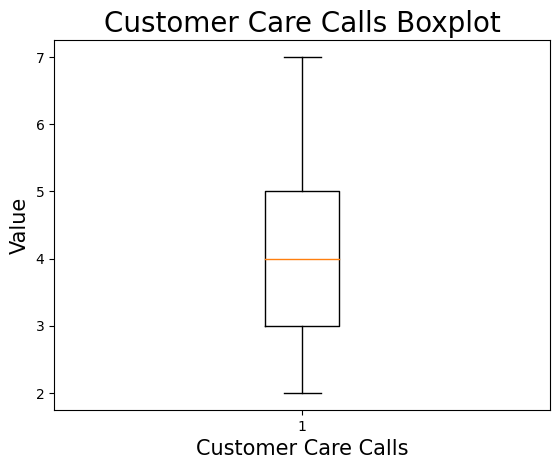

In [11]:
plt.boxplot(dfRetailShippingRaw['Customer_care_calls'])

plt.title('Customer Care Calls Boxplot', size = 20)
plt.xlabel('Customer Care Calls', size = 15)
plt.ylabel('Value', size = 15)

plt.show()

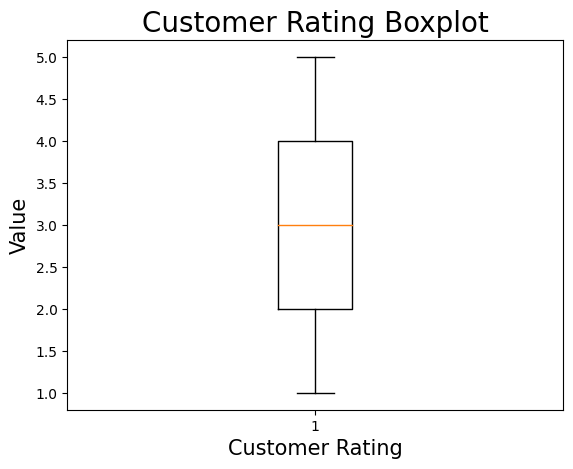

In [12]:
plt.boxplot(dfRetailShippingRaw['Customer_rating'])

plt.title('Customer Rating Boxplot', size = 20)
plt.xlabel('Customer Rating', size = 15)
plt.ylabel('Value', size = 15)

plt.show()

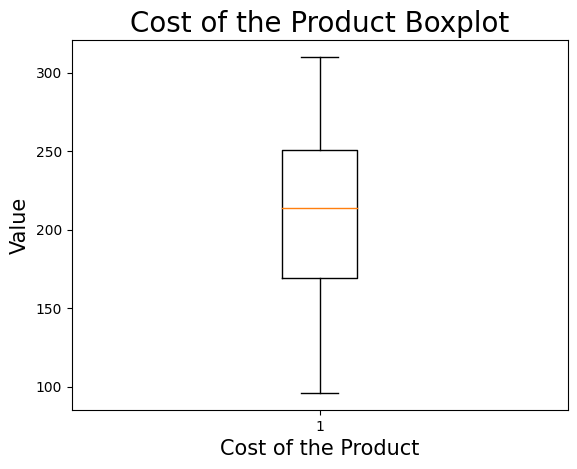

In [13]:
plt.boxplot(dfRetailShippingRaw['Cost_of_the_Product'])

plt.title('Cost of the Product Boxplot', size = 20)
plt.xlabel('Cost of the Product', size = 15)
plt.ylabel('Value', size = 15)

plt.show()

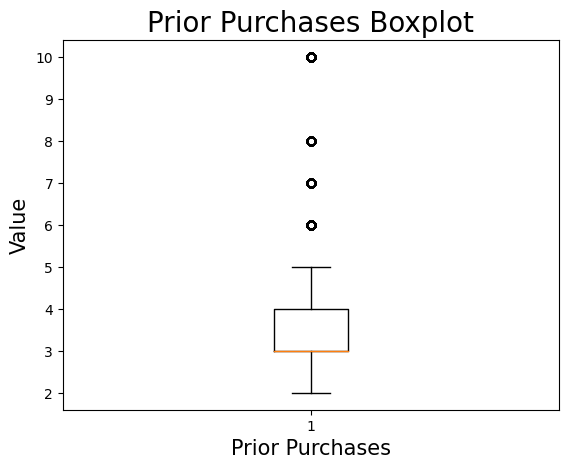

In [14]:
plt.boxplot(dfRetailShippingRaw['Prior_purchases'])

plt.title('Prior Purchases Boxplot', size = 20)
plt.xlabel('Prior Purchases', size = 15)
plt.ylabel('Value', size = 15)

plt.show()

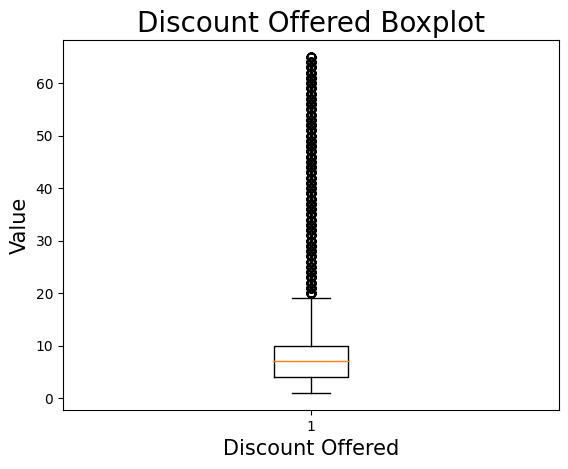

In [15]:
plt.boxplot(dfRetailShippingRaw['Discount_offered'])

plt.title('Discount Offered Boxplot', size = 20)
plt.xlabel('Discount Offered', size = 15)
plt.ylabel('Value', size = 15)

plt.show()

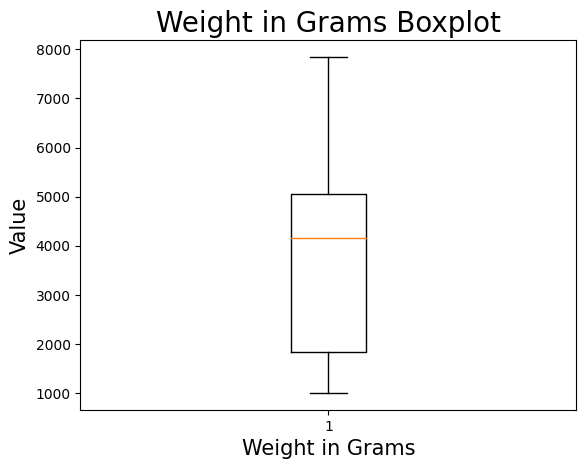

In [16]:
plt.boxplot(dfRetailShippingRaw['Weight_in_gms'])

plt.title('Weight in Grams Boxplot', size = 20)
plt.xlabel('Weight in Grams', size = 15)
plt.ylabel('Value', size = 15)

plt.show()

From all these boxplots, it seems that only 4 columns which are `Customer_care_calls`, `Customer_rating`, `Cost_of_the_Product`, `Weight_in_gms` that do not possess any outlier. However, columns like `Prior_purchases` and `Discount_offered` do have outliers existing within their boxplot, notably for `Discount_offered` since there are lot of outliers distributed past their upper quartiles. Further explanations will be elaborated below.

In [17]:
dfRetailShippingRaw['Prior_purchases'].value_counts()

3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_purchases, dtype: int64

In [18]:
display(dfRetailShippingRaw['Prior_purchases'].unique())
dfRetailShippingRaw['Prior_purchases'].nunique()

array([ 3,  2,  4,  6,  5,  7, 10,  8], dtype=int64)

8

Outliers found on `Prior_purchases` column distributed past its upper quartile which at this case 5 is the value. There are several values such as 6, 7, 8, and 10. This anomaly does not affect the DataFrame as whole since despite majority of the prior purchases between 2 to 5, there could be other customers that have made their purchases more than 5 times previously. This fact signifies that they are old customers that have been loyal to make inquiries of purchasing the product from the company. With that explanation, these outliers are not necessary to be removed as they are part of the DataFrame.

In [19]:
dfRetailShippingRaw['Discount_offered'].value_counts()

10    860
2     858
6     849
9     845
3     840
     ... 
65     36
26     36
42     35
25     34
30     34
Name: Discount_offered, Length: 65, dtype: int64

In [20]:
display(dfRetailShippingRaw['Discount_offered'].unique())
dfRetailShippingRaw['Discount_offered'].nunique()

array([44, 59, 48, 10, 46, 12,  3, 11, 29, 32,  1, 43, 45,  6, 36, 18, 38,
       51,  2, 28, 24, 31, 61, 22,  4, 62, 16, 56, 15,  9, 40, 37, 41, 17,
       64, 52, 49, 39, 14, 33, 21, 13, 23, 26, 57,  7, 35,  8,  5, 53, 55,
       47, 65, 25, 50, 60, 20, 19, 63, 58, 34, 54, 27, 42, 30],
      dtype=int64)

65

Outliers found on `Discount_offered` column distributed past its upper quartile which at this case approximately USD 20 is the value. There are several values concentrated just beyond approximately USD 20 until the highest value it can reach is USD 65. This anomaly does not affect the DataFrame as whole since despite majority of the discount offered between USD 2 to approximately USD 20, there could be other products that are given special discount if the customers purchase it with certain condition such as buying it in a large sum to receive more discount offered. Such fact is the nature of the types of product and with that explanation, these outliers are not necessary to be removed as they are part of the DataFrame.

___
## **Cleaned Data**
___

With that procedure, that concludes the phase of data cleaning. A new DataFrame consisted of the cleaned data is made, ready to be used in analysis phase.

In [21]:
dfRetailShipping = dfRetailShippingRaw.copy()
dfRetailShipping

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Shipping_delay
0,1,D,Flight,4,2,177,3,low,F,44,1233,True
1,2,F,Flight,4,5,216,2,low,M,59,3088,True
2,3,A,Flight,2,2,183,4,low,M,48,3374,True
3,4,B,Flight,3,3,176,4,medium,M,10,1177,True
4,5,C,Flight,2,2,184,3,medium,F,46,2484,True
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,True
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,False
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,False
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,False


In [22]:
dfRetailShipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Shipping_delay       10999 non-null  bool  
dtypes: bool(1), int64(7), object(4)
memory usage: 956.1+ KB


___
## **Data Analysis**
___

In the analysis phase, the challenge that needs to be addressed is whether each of the warehouse can be fully optimized to meet certain standard of satisfaction by assessing it according to few parameters. Key findings then will be used to determine what are the lacking key factors from each warehouse and what kinds of improvement to mitigate those lacking key factors. `Warehouse_block` parameter will be set as the main component to be compared with several related parameters. The relationship between those parameters and `Warehouse_block` parameter will be drawn into a conclusion and followed with a visualization to elaborate it.

Initially, a pie chart needs to be created to see the storing capacity comparison between each warehouse.

In [23]:
# Create DataFrame for Warehouse
PieWarehouse = dfRetailShipping[['Warehouse_block']].value_counts()
PieWarehouse = pd.DataFrame(PieWarehouse, columns = ['Count']).reset_index()

# Percentage of Warehouse
PieWarehouse['Percentage'] = (PieWarehouse['Count'] / PieWarehouse['Count'].sum())*100
PieWarehouse

,Warehouse_block,Count,Percentage
0,F,3666,33.330303
1,D,1834,16.674243
2,A,1833,16.665151
3,B,1833,16.665151
4,C,1833,16.665151


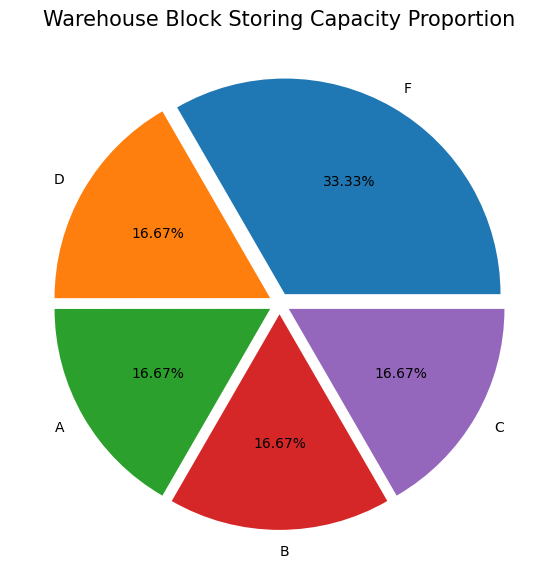

In [24]:
# Create Pie Chart of Warehouse Block Storing Capacity Proportion
plt.figure(figsize = (15,7))
plt.pie(x = PieWarehouse['Percentage'],
    labels = PieWarehouse['Warehouse_block'],
    autopct = f'%.2f%%',
    explode = (0.05, 0.05, 0.05, 0.05, 0.05)
    )

plt.title('Warehouse Block Storing Capacity Proportion', size = 15)
plt.show()

From the pie chart itself, warehouse block F amasses the largest proportion with 33.33% followed by the remaining of the warehouse blocks with 16.67% each. Warehouse block F is able to hold its storing capacity twice as large as whatever warehouse block A, B, C, and D are 
able to withstand.

## **Key Factors:**

### Based on `Mode_of_Shipment`

A cross-tabulation is made between `Warehouse_block` parameter acting as the row and `Mode_of_Shipment` parameter acting as the column.

In [25]:
pd.crosstab(dfRetailShipping['Warehouse_block'], dfRetailShipping['Mode_of_Shipment'], margins = True, margins_name = 'Total')

Mode_of_Shipment,Flight,Road,Ship,Total
Warehouse_block,,,,
A,297,294,1242,1833
B,296,294,1243,1833
C,295,294,1244,1833
D,297,292,1245,1834
F,592,586,2488,3666
Total,1777,1760,7462,10999


From the cross-tabulation, it can be concluded that ship contributes to the highest portion in mode of shipment compared to other transports. Despite dominating the proportion, since the correlation revolves around warehouse optimization, therefore the main interest will be the road transportation instead. This is due to the fact both flight and ship transportations require specialized infrastructure such as seaports and air cargo terminals which are not connected directly to the loading dock of a warehouse. Many commercial buildings and facilities are equipped with loading docks and the only transport which is capable to easily grant access into the loading dock of a warehouse is the road transportation.

The road shipment will be compared entirely between each warehouse and a pie chart will be constructed to see the proportion difference on road `Mode_of_Shipment` within each warehouse.

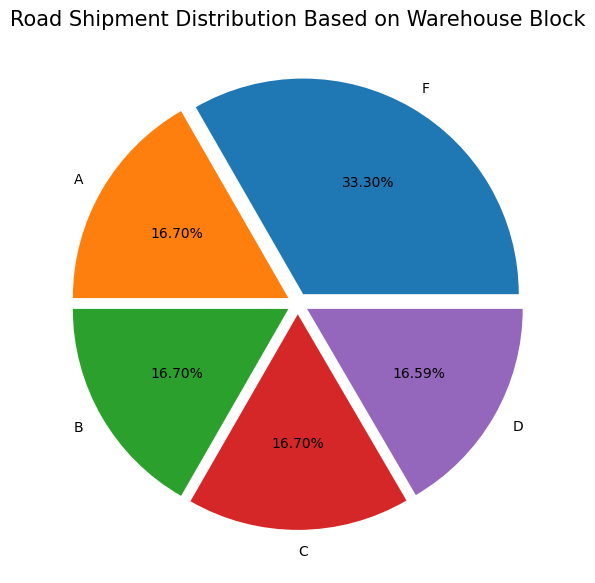

In [26]:
# Filter the DataFrame to only include rows where 'Mode_of_Shipment' equals Road
dfRoad = dfRetailShipping[dfRetailShipping['Mode_of_Shipment'] == 'Road']

# Find value counts of 'Warehouse_block' in the filtered DataFrame
warehouse_counts = dfRoad['Warehouse_block'].value_counts()

# Create Pie Chart of Road Shipment Distribution on Each Warehouse Block
plt.figure(figsize = (15,7))
plt.pie(dfRoad['Warehouse_block'].value_counts(), labels = warehouse_counts.index, autopct='%1.2f%%', explode = (0.05, 0.05, 0.05, 0.05, 0.05))
plt.title('Road Shipment Distribution Based on Warehouse Block', size = 15)
plt.show()

Based on the pie chart, warehouse block F has the largest proportion in road shipment with 33.30%, followed by warehouse block A, B, and C with 16.70% each, while warehouse block D occurs the least usage in road shipment with 16.59%. Warehouse block F deploys road shipment twice as many as the rest of the warehouse blocks, in fact not just in road transportation but with other shipment methods as well.

In the context of warehousing, there is a term known as 'bottleneck' which refers to a point or process within the warehouse operations that restricts the flow of goods, materials, or information, resulting in reduced efficiency and potential delays. It can occur at various stages of warehousing operations and some of the common causes include limited physical space, inefficient layout or flow, manual processing or labor constraints, equipment limitations, and ineffective inventory management.

Since warehouse optimization is the main context, there is a noticable pattern from the pie chart proportion and the bottleneck. The general idea is the higher the occurence of a warehouse block in deploying shipment, the higher the risk as well for such warehouse block to be exposed with bottleneck case. Warehouse block F simply tops the road shipment due to its larger storing capacity compared to the rest of the warehouse blocks which is always a good thing, however it has a higher chance of exposure to bottleneck incident as a tradeoff.

In order to alleviate this issue, the recommendation will be increasing number of loading docks for warehouse block with larger warehousing area so that bottleneck issue can be minimized.

### Based on `Cost_of_the_Product`

First, `Cost_of_the_Product` parameter will be grouped based on 3 categories which are expensive, medium, and cheap.

- Expensive: when cost of the product is equal or more than USD 251.
- Medium: when cost of the product is between USD 169 to lesser than USD 251.
- Cheap: when the cost of the product is lesser than USD 169.

The consideration factor to group `Cost_of_the_Product` parameter into 3 categories is based on the lower percentile (25%) and upper percentile (75%) which are on USD 169 and USD 251 respectively.

In [27]:
dfRetailShipping.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


In [28]:
# Create Cost Product Category
def tierCost(x):
  if x >= 251:
    return 'Expensive'
  elif 169 <= x < 251:
    return 'Medium'
  else:
    return 'Cheap'
  
dfRetailShipping['Cost_Category'] = dfRetailShipping['Cost_of_the_Product'].apply(tierCost)

dfRetailShipping = dfRetailShipping[['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Cost_Category', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms', 'Shipping_delay']]
dfRetailShipping

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Cost_Category,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Shipping_delay
0,1,D,Flight,4,2,177,Medium,3,low,F,44,1233,True
1,2,F,Flight,4,5,216,Medium,2,low,M,59,3088,True
2,3,A,Flight,2,2,183,Medium,4,low,M,48,3374,True
3,4,B,Flight,3,3,176,Medium,4,medium,M,10,1177,True
4,5,C,Flight,2,2,184,Medium,3,medium,F,46,2484,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,Expensive,5,medium,F,1,1538,True
10995,10996,B,Ship,4,1,232,Medium,5,medium,F,6,1247,False
10996,10997,C,Ship,5,4,242,Medium,5,low,F,4,1155,False
10997,10998,F,Ship,5,2,223,Medium,6,medium,M,2,1210,False


In [29]:
pd.crosstab(dfRetailShipping['Warehouse_block'], dfRetailShipping['Cost_Category'], margins = True, margins_name = 'Total')

Cost_Category,Cheap,Expensive,Medium,Total
Warehouse_block,,,,
A,473,456,904,1833
B,409,460,964,1833
C,422,481,930,1833
D,434,476,924,1834
F,946,905,1815,3666
Total,2684,2778,5537,10999


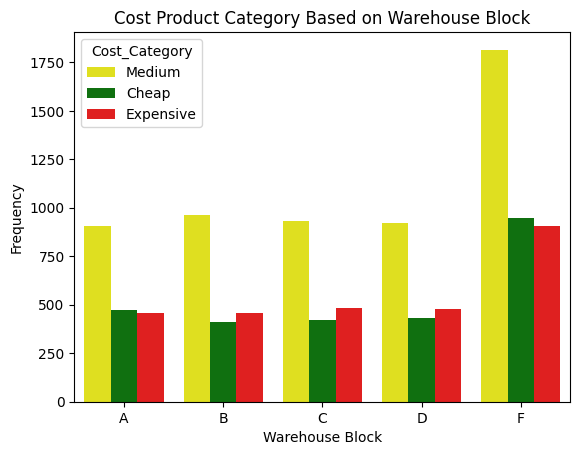

In [30]:
# Group the Data and Calculate the Frequencies
dfCostCat = dfRetailShipping.groupby('Warehouse_block')['Cost_Category'].value_counts().reset_index(name = 'Frequency')

# Set the Color Palette
colors = ['yellow', 'green', 'red']

# Create the Bar Plot
ax = sns.barplot(data = dfCostCat, x = 'Warehouse_block', y = 'Frequency', hue = 'Cost_Category', palette = colors)
plt.title('Cost Product Category Based on Warehouse Block')
plt.xlabel('Warehouse Block')
plt.ylabel('Frequency')
plt.show()

Based on the bar plot, it can be seen medium cost product category has the largest proportion among every warehouse block compared to other cost product categories. Warehouse block F seems to own the highest number of cost product amongst all warehouse blocks regardless its category. This may be further supported with the fact that warehouse block F is able to store products twice as large as the rest of the warehouse blocks.

In the context of warehousing, there is a term known as 'loading damage' where there is always a chance that product gets damaged during loading process. It can be ranging from human error or machinery error that causes it. When a product gets damaged, it becomes unmarketable thus leads to a company's loss. Warehouse block might want to be on high alert on the product that falls into expensive category since the higher such product being stored in a warehouse block, the higher chance of exposure for such warehouse block to experience loading damage which leads to an inexplicable loss.

Since warehouse optimization is the main context, there is a noticable pattern from the bar plot and the loading damage. The general idea is the higher number of a cost product category being stored in a warehouse block, the higher the risk as well for such warehouse block to be exposed with loading damage. Warehouse block F simply tops the cost product category due to its larger storing capacity compared to the rest of the warehouse blocks which is always a good thing, however it has a higher chance of exposure to loading damage as a tradeoff which leads to a more potential threat.

In order to alleviate this issue, the recommendation will be using appropriate lifting and handling equipment to minimize the risk of dropping or mishandling products and maintaining a clean loading surfaces to reduce the potential for impacts or jolts.

### Based on `Weight_in_gms`

First, `Weight_in_gms` parameter will be grouped based on 3 categories which are heavy, medium, and light.

- Heavy: when cost of the product is equal or more than 5,050.00 grams.
- Medium: when cost of the product is between 1,839.50 grams to lesser than 5,050.00 grams.
- Light: when the cost of the product is lesser than 1,839.50 grams.

The consideration factor to group `Weight_in_gms` parameter into 3 categories is based on the lower percentile (25%) and upper percentile (75%) which are on 1,839.50 grams and 5,050.00 grams respectively.

In [31]:
dfRetailShipping.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


In [32]:
# Create Weight Product Category
def tierWeight(x):
  if x >= 5050:
    return 'Heavy'
  elif 1839.50 <= x < 5050:
    return 'Medium'
  else:
    return 'Light'
  
dfRetailShipping['Weight_Category'] = dfRetailShipping['Weight_in_gms'].apply(tierWeight)

dfRetailShipping = dfRetailShipping[['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Cost_Category', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms', 'Weight_Category', 'Shipping_delay']]
dfRetailShipping

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Cost_Category,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Weight_Category,Shipping_delay
0,1,D,Flight,4,2,177,Medium,3,low,F,44,1233,Light,True
1,2,F,Flight,4,5,216,Medium,2,low,M,59,3088,Medium,True
2,3,A,Flight,2,2,183,Medium,4,low,M,48,3374,Medium,True
3,4,B,Flight,3,3,176,Medium,4,medium,M,10,1177,Light,True
4,5,C,Flight,2,2,184,Medium,3,medium,F,46,2484,Medium,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,Expensive,5,medium,F,1,1538,Light,True
10995,10996,B,Ship,4,1,232,Medium,5,medium,F,6,1247,Light,False
10996,10997,C,Ship,5,4,242,Medium,5,low,F,4,1155,Light,False
10997,10998,F,Ship,5,2,223,Medium,6,medium,M,2,1210,Light,False


In [33]:
pd.crosstab(dfRetailShipping['Warehouse_block'], dfRetailShipping['Weight_Category'], margins = True, margins_name = 'Total')

Weight_Category,Heavy,Light,Medium,Total
Warehouse_block,,,,
A,458,485,890,1833
B,469,464,900,1833
C,451,442,940,1833
D,436,433,965,1834
F,937,926,1803,3666
Total,2751,2750,5498,10999


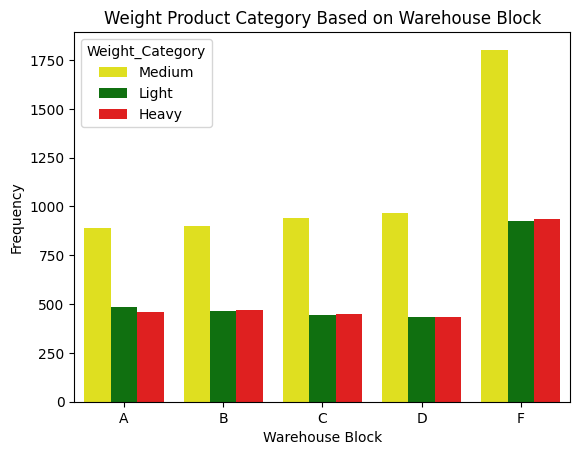

In [34]:
# Group the Data and Calculate the Frequencies
dfWeightCat = dfRetailShipping.groupby('Warehouse_block')['Weight_Category'].value_counts().reset_index(name = 'Frequency')

# Set the Color Palette
colors = ['yellow', 'green', 'red']

# Create the Bar Plot
ax = sns.barplot(data = dfWeightCat, x = 'Warehouse_block', y = 'Frequency', hue = 'Weight_Category', palette = colors)
plt.title('Weight Product Category Based on Warehouse Block')
plt.xlabel('Warehouse Block')
plt.ylabel('Frequency')
plt.show()

Based on the bar plot, it can be seen medium weight product category has the largest proportion among every warehouse block compared to other weight product categories. Warehouse block F seems to own the highest number of weight product amongst all warehouse blocks regardless its category. This may be further supported with the fact that warehouse block F is able to store products twice as large as the rest of the warehouse blocks.

In the context of warehousing, there is a term known as 'space optimization' which refers to the efficient and effective utilization of available storage space to accommodate as many products as possible while maintaining accessibility and ensuring proper organization. The goal of space optimization is to minimize wasted or unused space, reduce storage costs, and maximize the capacity of the warehouse.

Since warehouse optimization is the main context, there is a noticable pattern from the bar plot and the space optimization. The general idea is the higher number of a weight product category being stored in a warehouse block, the higher expectation as well for such warehouse block to implement space optimization. Warehouse block F simply tops the weight product category due to its larger storing capacity compared to the rest of the warehouse blocks, however it has a higher expectation to implement space optimization.

In order to enhance the space optimization concept, the recommendation will be relocating the heavy weight products category solely on warehouse block F. Normally during loading and unloading process, special equipment is needed to assist the process on such products that are heavier. By utilizing its spacious warehousing area, those heavy weight products category alongside the specialized loading equipments can be efficiently stored in warehouse block F, thus optimizing its space and maximizing a faster product turnover. That leaves both light and medium weight products category to be distributed evenly to warehouse block A to D since they do not have that much space to optimize but the types of product they store means specialized loading equipments are unnecessary needed for these warehouse blocks to keep, thus inline with warehouse optimization concept.

### Based on `Shipping_delay`

A cross-tabulation is made between `Warehouse_block` parameter acting as the row and `Shipping_delay` parameter acting as the column.

In [35]:
pd.crosstab(dfRetailShippingRaw['Warehouse_block'], dfRetailShippingRaw['Shipping_delay'], margins = True, margins_name = 'Total')

Shipping_delay,False,True,Total
Warehouse_block,,,
A,758,1075,1833
B,729,1104,1833
C,739,1094,1833
D,738,1096,1834
F,1472,2194,3666
Total,4436,6563,10999


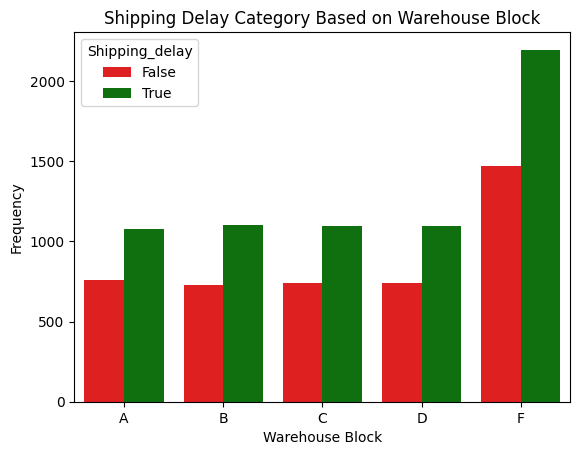

In [36]:
# Group the Data and Calculate the Frequencies
dfShippingDelay = dfRetailShipping.groupby('Warehouse_block')['Shipping_delay'].value_counts().reset_index(name = 'Frequency')

# Set the Color Palette
colors = ['red', 'green']

# Create the Bar Plot
ax = sns.barplot(data = dfShippingDelay, x = 'Warehouse_block', y = 'Frequency', hue = 'Shipping_delay', palette = colors)
plt.title('Shipping Delay Category Based on Warehouse Block')
plt.xlabel('Warehouse Block')
plt.ylabel('Frequency')
plt.show()

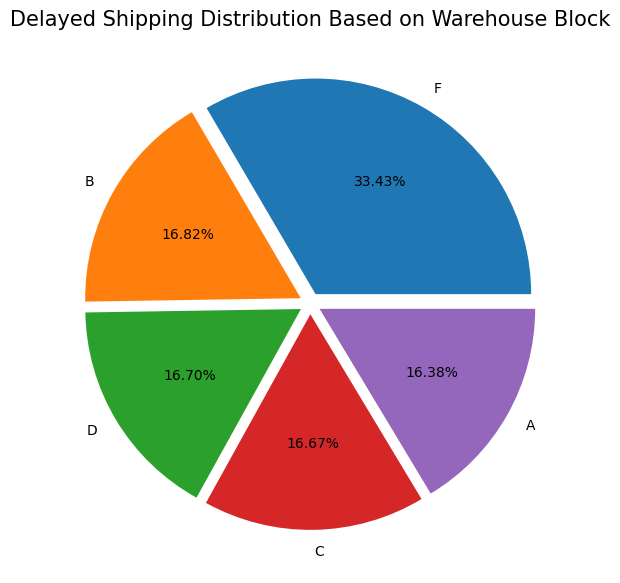

In [37]:
# Filter the DataFrame to only include rows where 'Shipping_delay' equals True
dfDelayTrue = dfRetailShipping[dfRetailShipping['Shipping_delay'] == True]

# Find value counts of 'Warehouse_block' in the filtered DataFrame
warehouse_counts = dfDelayTrue['Warehouse_block'].value_counts()

# Create Pie Chart of Shipping Delay True Distribution on Each Warehouse Block
plt.figure(figsize = (15,7))
plt.pie(dfDelayTrue['Warehouse_block'].value_counts(), labels = warehouse_counts.index, autopct='%1.2f%%', explode = (0.05, 0.05, 0.05, 0.05, 0.05))
plt.title('Delayed Shipping Distribution Based on Warehouse Block', size = 15)
plt.show()

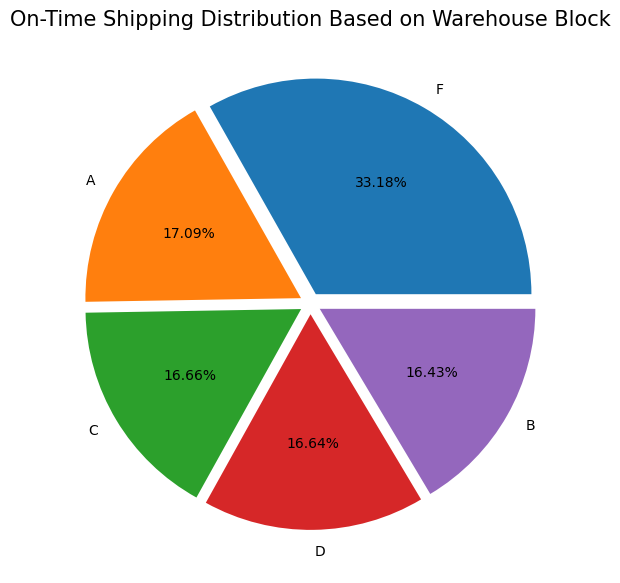

In [38]:
# Filter the DataFrame to only include rows where 'Shipping_delay' equals False
dfDelayFalse = dfRetailShipping[dfRetailShipping['Shipping_delay'] == False]

# Find value counts of 'Warehouse_block' in the filtered DataFrame
warehouse_counts = dfDelayFalse['Warehouse_block'].value_counts()

# Create Pie Chart of Shipping Delay False Distribution on Each Warehouse Block
plt.figure(figsize = (15,7))
plt.pie(dfDelayFalse['Warehouse_block'].value_counts(), labels = warehouse_counts.index, autopct='%1.2f%%', explode = (0.05, 0.05, 0.05, 0.05, 0.05))
plt.title('On-Time Shipping Distribution Based on Warehouse Block', size = 15)
plt.show()

From the bar plot, it can be concluded that warehouse block F has the highest occurence of delayed shipping compared to the rest of the warehouse blocks. Strangely enough, warehouse block F also has the highest occurence of on-time shipping compared to the rest of the warehouse blocks. Despite these facts, it cannot be claimed that warehouse block F being the most efficient warehouse block. The ratio of on-time shipping and ratio of delayed shipping are constructed in a pie chart to further elaborate the hypothesis.

From the pie chart regardless the category in on-time shipping or delayed shipping, warehouse block F produces the highest proportion amongst the rest of warehouse blocks. However, there is one main finding from both pie charts which is related to warehouse optimization. To determine whether a warehouse block has an efficient way of shipping, the portion of the on-time shipping must be larger than the delayed shipping.

Based on these pie charts, only warehouse block A that has a larger on-time shipping proportion (17.09%) over delayed shipping proportion (16.38%) compared to the rest of warehouse blocks. Warehouse block C despite accumulates almost similar amount of on-time shipping proportion (16.66%) and delayed shipping proportion (16.67%), it is still considered underperforming and barely comes close to warehouse block A. Therefore, warehouse block A is deemed to be the most efficient compared with the rest of warehouse blocks despite only manages a 0.71% efficiency rate.

In order to alleviate issues on warehouse blocks that are underperforming, the recommendation will be reevaluate the SOP for every warehouse block to meet certain standard of satisfaction where warehouse block A should be the main indicator for every warehouse block strives to emulate. Warehouse block A that has set the bar for being the most efficient in shipping delivery should keep improving and raising that standard so the delayed shipping proportion can be mitigated and the on-time shipping proportion can be increased.

___
## **Conclusions**
___

From the previous analysis, the main conclusions regarding whether each of the warehouse can be fully optimized to meet certain standard of satisfaction by assessing it according to several related parameters are as following:

- Warehouse block F is able to hold its storing capacity twice as large as whatever warehouse block A, B, C, and D are able to withstand.

### Based on `Mode_of_Shipment`:
- Warehouse block F deploys the most shipment methods twice as many as the rest of the warehouse blocks.
- Warehouse block F simply tops the road shipment compared to the rest of the warehouse blocks, however has a higher chance of exposure to bottleneck incident as a tradeoff.

### Based on `Cost_of_the_Product`:
- Medium cost product category has the largest proportion among every warehouse block compared to other cost product categories.
- Warehouse block F owns the highest number of cost product amongst all warehouse blocks regardless its category.
- Warehouse block F simply tops the cost product category compared to the rest of the warehouse blocks, however has a higher chance of exposure to loading damage as a tradeoff which leads to a more potential threat.

### Based on `Weight_in_gms`:
- Medium weight product category has the largest proportion among every warehouse block compared to other weight product categories.
- Warehouse block F owns the highest number of weight product amongst all warehouse blocks regardless its category.
- Warehouse block F simply tops the weight product category compared to the rest of the warehouse blocks, however has a higher expectation to implement space optimization.

### Based on `Shipping_delay`:
- Warehouse block F has the highest occurence of delayed shipping and on-time shipping compared to the rest of the warehouse blocks.
- warehouse block F produces the highest proportion of delayed shipping and on-time shipping amongst the rest of warehouse blocks.
- Only warehouse block A that has a larger on-time shipping proportion over delayed shipping proportion compared to the rest of warehouse blocks which is deemed to be the most efficient warehouse block.

___
## **Recommendations**
___

From the previous analysis, several recommendations that may be suggested are as following:
- Increasing number of loading docks for warehouse block with larger warehousing area so that bottleneck issue can be minimized.
- Using appropriate lifting and handling equipment to minimize the risk of dropping or mishandling products and maintaining a clean loading surfaces to reduce the potential for impacts or jolts.
- Relocating the heavy weight products category and the specialized loading equipments solely on warehouse block F by utilizing its spacious warehousing area, thus optimizing its space and maximizing a faster product turnover.
- Distributing both light and medium weight products category evenly to warehouse block A to D according to their space while maintaining the warehouse optimization concept.
- Reevaluating the SOP for every warehouse block to meet certain standard of satisfaction according to warehouse block A as the main indicator.
- Improving and raising that satisfaction standard so the delayed shipping proportion can be mitigated and the on-time shipping proportion can be increased.